In this example, we subject the DFT to a 1 Hz sine wave. Also, optimiztion is done in some sections of the code to reduce complexity as compared to the first example.

In [143]:
import numpy as np
import matplotlib.pyplot as plt

In [144]:
#Defining the parameters.
f = 1
fs = 10 #sampling frequency
start = 0
end = 1
t = np.arange(start, end, 1/fs) #time

<StemContainer object of 3 artists>

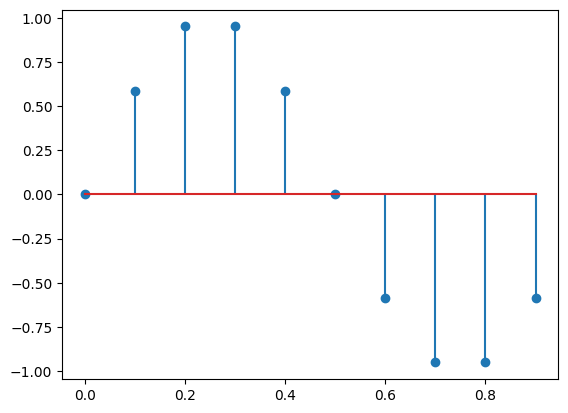

In [145]:
#Plotting the signal
x = np.sin(2 * np.pi * f * t) 
plt.stem(t, x)

In [146]:
K = len(x)      # DFT length
results = np.zeros(K, dtype=complex)

# Twiddle Factor
W = np.exp((-1j * 2 * np.pi) / K)

#Implementing the DFT
for k in range(K):
    for i in range(K):
        results[k] = results[k] + (x[i] * W**(k*i))

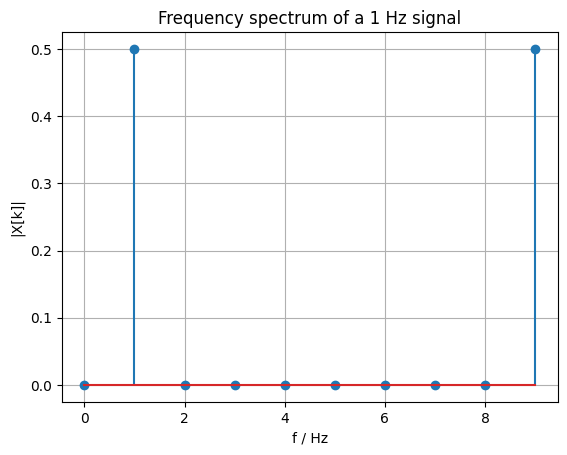

In [147]:
#Calculating the amplitude spectrum
freq = (np.arange(K) * fs) / K
amplitude = np.abs(results) / K

#Plotting the amplitude spectrum (Two sided spectrum)
plt.stem(freq, amplitude)
plt.title("Frequency spectrum of a 1 Hz signal")
plt.xlabel("f / Hz")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

Notes:

- In this example, the twiddle factor - $W^{kn}_N$ - was introduced. Hence, the complex exponential was computed once per K, reducing the time it had to calculated in the loop over again.

- The formulas for calculating the amplitude spectrum were also reduced. The _freq_ formula, maps the frequency bin _k_ to its corresponding frequency. The relation is: $f = (k \times f_s) / N$ where _k_ is the frequency bin, _f_s_ is the sampling frequency, and _N_ is the DFT length. Also, the frequency resolution, the spacing of the frequencies, is determined by the formula: $\Delta f = f_s/N$

- In calculating the amplitude spectrum, NumPy's absolute-value operation was employed to calculate the magnitude of the DFT coefficients: the complex results obtained. 
$$A[k] = \frac{1}{N} \sqrt{\text{Re}(X[k])^2 + \text{Im}(X[k])^2}$$

- Finally, one would have expected a single spike since it's a 1 Hz signal, but we're seeing two spikes. As said, the DFT sees a finite signal as one period of a periodic signal, so both the signal and its spectrum naturally repeat every _N_ samples in the time domain and every _f_s_ Hz in the frequency domain. Remember aliasing? The frequencies present within the signal should be between 0 and half the sampling frequency.